In [ ]:
!pip install nibabel pydicom opencv-python tensorflow matplotlib scikit-learn

import os
import cv2
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change path to where your unzipped dataset is
DATASET_PATH = "/content/dataverse_files.zip"

Mounted at /content/drive


In [ ]:
import os
import zipfile

# Path to your uploaded zip file in Colab
ZIP_PATH = "/content/dataverse_files.zip"   # <-- adjust if you uploaded elsewhere
EXTRACT_PATH = "/content/crl_fetal_brain_atlas"

# Unzip
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

# Now point DATASET_PATH to the extracted folder
DATASET_PATH = EXTRACT_PATH
print("Extracted files:", os.listdir(DATASET_PATH)[:10])


Extracted files: ['STA31_tissue.nii.gz', 'STA29_tissue.nii.gz', 'STA30_tissue.nii.gz', 'STA22_regional.nii.gz', 'STA33.nii.gz', 'STA23_regional.nii.gz', 'STA25.nii.gz', 'STA26_regional.nii.gz', 'STA35_regional.nii.gz', 'STA38exp_regional.nii.gz']


In [ ]:
import os
import re
import zipfile
import nibabel as nib
import numpy as np
import cv2
import pandas as pd

# 1. Unzip dataset
ZIP_PATH = "/content/dataverse_files.zip"
EXTRACT_PATH = "/content/crl_fetal_brain_atlas"

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

DATASET_PATH = EXTRACT_PATH
OUTPUT_PATH = "/content/fetal_slices"
os.makedirs(OUTPUT_PATH, exist_ok=True)

# 2. Extract slices
labels = []

for file in os.listdir(DATASET_PATH):
    if file.endswith(".nii.gz") and "_regional" not in file and "_tissue" not in file:
        filepath = os.path.join(DATASET_PATH, file)
        img = nib.load(filepath).get_fdata()

        match = re.search(r'\d+', file)
        if match:
            ga = int(match.group())
        else:
            continue

        img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255.0
        img = img.astype(np.uint8)

        for i in range(img.shape[2]):
            slice_img = img[:, :, i]
            slice_img = cv2.resize(slice_img, (224, 224))
            filename = f"{file.replace('.nii.gz','')}_slice{i}.png"
            filepath_out = os.path.join(OUTPUT_PATH, filename)
            cv2.imwrite(filepath_out, slice_img)
            labels.append([filepath_out, ga])

# 3. Save CSV with slice paths + GA labels
labels_df = pd.DataFrame(labels, columns=["filepath", "GA"])
labels_df.to_csv("/content/fetal_labels.csv", index=False)

print("✅ Done. Total slices extracted:", len(labels_df))
print(labels_df.head())


✅ Done. Total slices extracted: 2790
                                 filepath  GA
0  /content/fetal_slices/STA33_slice0.png  33
1  /content/fetal_slices/STA33_slice1.png  33
2  /content/fetal_slices/STA33_slice2.png  33
3  /content/fetal_slices/STA33_slice3.png  33
4  /content/fetal_slices/STA33_slice4.png  33


Found 1950 validated image filenames.
Found 345 validated image filenames.
Found 405 validated image filenames.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 490ms/step - loss: 27.4520 - mae: 27.4520 - val_loss: 24.5984 - val_mae: 24.5984 - learning_rate: 1.0000e-04
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 440ms/step - loss: 23.0940 - mae: 23.0940 - val_loss: 18.9898 - val_mae: 18.9898 - learning_rate: 1.0000e-04
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 438ms/step - loss: 17.0854 - mae: 17.0854 - val_loss: 11.1296 - val_mae: 11.1296 - learning_rate: 1.0000e-04
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 433ms/step - loss: 9.4746 - mae: 9.4746 - val_loss: 5.1285 - val_mae: 5.1285 - learning_rate: 1.0000e-04
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 440ms/step - loss: 6.3213 - mae: 6.3213 - val_loss: 4.3427 - val_mae: 4.3427 - learning_rate: 1.0000e-04
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 439ms/step - loss: 5.7869 - mae: 5.7869 - val_loss: 4.1884 - val_mae: 4.1884 - learning_rate: 1.0000e-04
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 434ms/step - loss: 5.2563 - mae: 5.2563 - val_loss: 4.1396 - val

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 52s 628ms/step - loss: 27.4664 - mae: 27.4664 - val_loss: 16.1710 - val_mae: 16.1710 - learning_rate: 1.0000e-04
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - loss: 12.5472 - mae: 12.5472 - val_loss: 4.3563 - val_mae: 4.3563 - learning_rate: 1.0000e-04
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 380ms/step - loss: 5.3492 - mae: 5.3492 - val_loss: 4.2715 - val_mae: 4.2715 - learning_rate: 1.0000e-04
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 387ms/step - loss: 5.2679 - mae: 5.2679 - val_loss: 4.2583 - val_mae: 4.2583 - learning_rate: 1.0000e-04
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 456ms/step - loss: 5.3253 - mae: 5.3253 - val_loss: 4.2619 - val_mae: 4.2619 - learning_rate: 1.0000e-04
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 401ms/step - loss: 5.2331 - mae: 5.2331 - val_loss: 4.2376 - val_mae: 4.2376 - learning_rate: 1.0000e-04
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 400ms/step - loss: 

VGG16 test:
MAE (weeks): 3.475
ResNet50 test:
MAE (weeks): 4.01


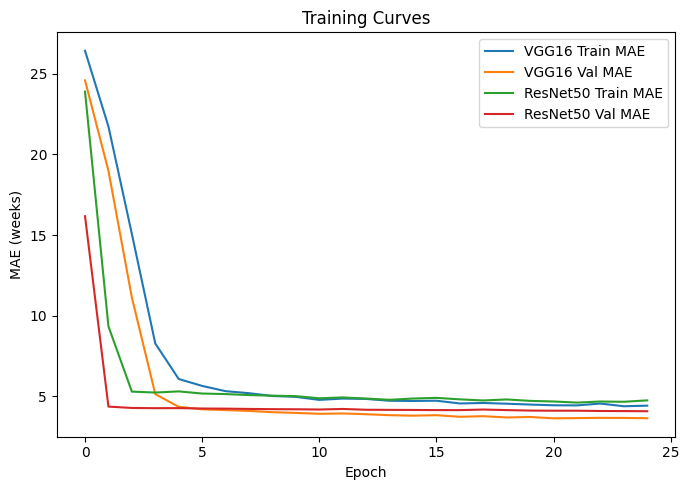

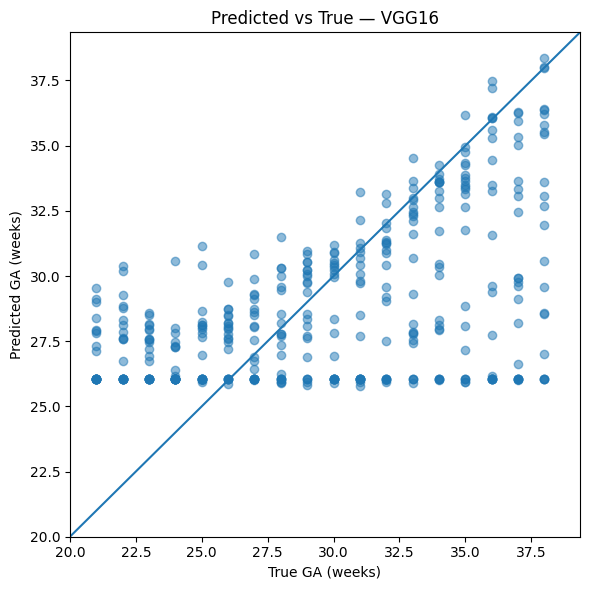

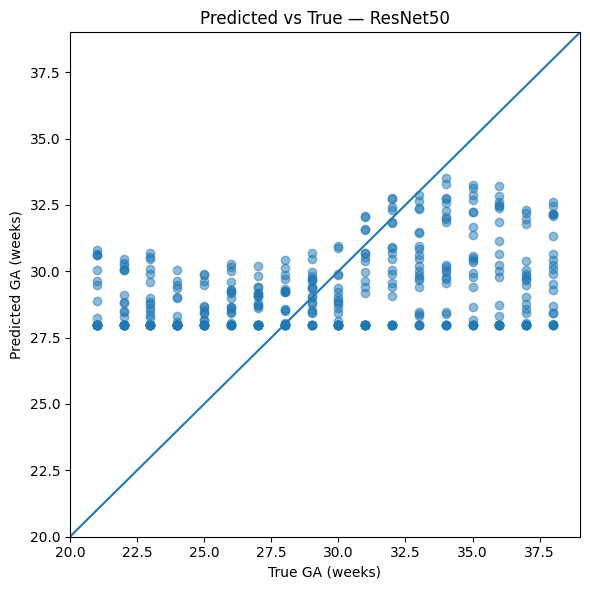

/tmp/ipython-input-3405735912.py:126: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  maes = df.groupby("GA").apply(lambda d: np.mean(np.abs(d["pred"]-d["true"])))
/tmp/ipython-input-3405735912.py:126: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  maes = df.groupby("GA").apply(lambda d: np.mean(np.abs(d["pred"]-d["true"])))


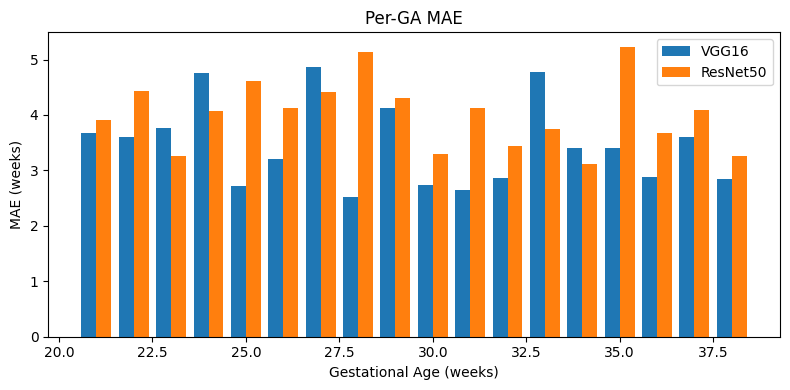

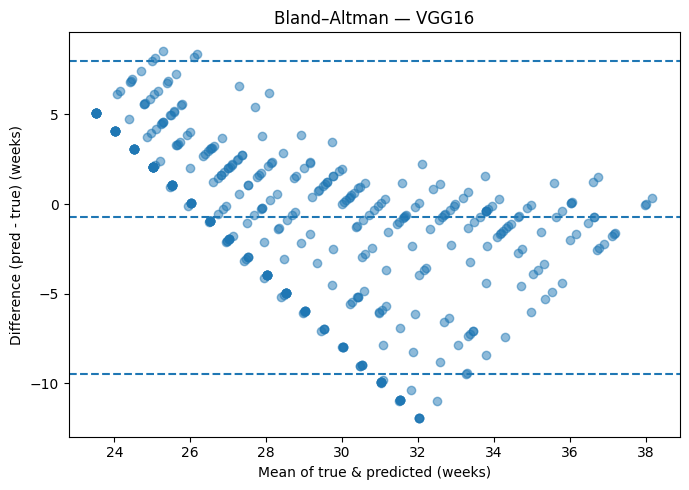

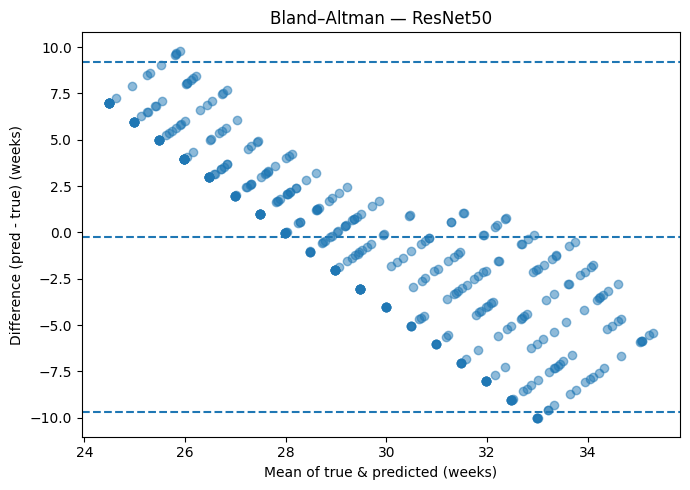

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_48']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_72']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


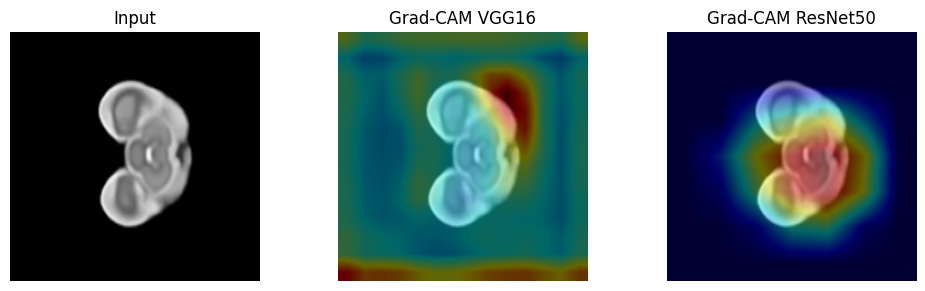

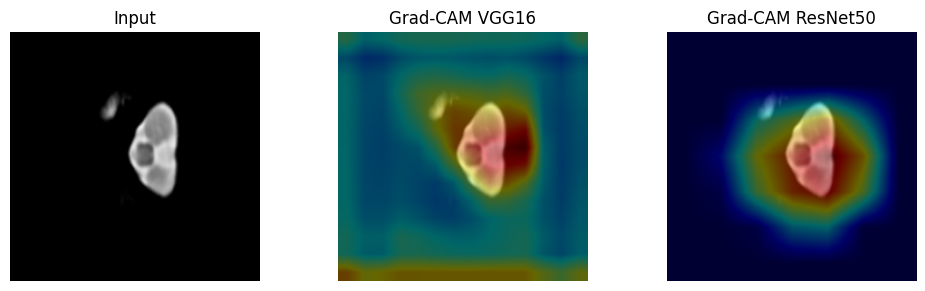

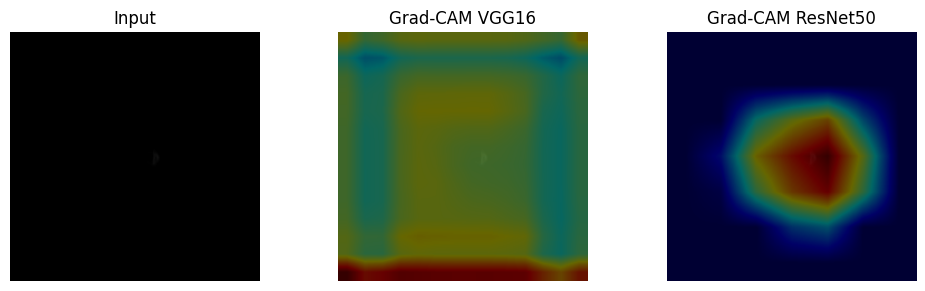

saved files in /content:
['scatter_resnet.png', 'gradcam_2.png', 'bland_altman_vgg.png', 'model_resnet50_ga.h5', 'gradcam_3.png', 'bland_altman_resnet.png', 'scatter_vgg.png', 'per_ga_mae.png', 'model_vgg16_ga.h5', 'training_curves.png', 'gradcam_1.png']


In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, cv2, random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

SEED = 123
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

CSV_PATH = "/content/fetal_labels.csv"
IMG_DIR  = "/content/fetal_slices"

labels_df = pd.read_csv(CSV_PATH)
labels_df = labels_df[labels_df['filepath'].apply(os.path.exists)].reset_index(drop=True)

MAX_PER_GA = 150
balanced = []
for ga, sub in labels_df.groupby("GA"):
    k = min(len(sub), MAX_PER_GA)
    balanced.append(sub.sample(n=k, random_state=SEED))
labels_df = pd.concat(balanced).sample(frac=1, random_state=SEED).reset_index(drop=True)

train_df, test_df = train_test_split(labels_df, test_size=0.15, random_state=SEED, stratify=labels_df["GA"])
train_df, val_df  = train_test_split(train_df,  test_size=0.15, random_state=SEED, stratify=train_df["GA"])

def make_gen(df, augment, batch=32):
    if augment:
        datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=10,
            width_shift_range=0.05,
            height_shift_range=0.05,
            horizontal_flip=True
        )
    else:
        datagen = ImageDataGenerator(rescale=1./255)
    return datagen.flow_from_dataframe(
        df, x_col="filepath", y_col="GA",
        target_size=(224,224), color_mode="rgb",
        class_mode="raw", shuffle=True, batch_size=batch, seed=SEED
    )

train_gen = make_gen(train_df, augment=True,  batch=32)
val_gen   = make_gen(val_df,   augment=False, batch=32)
test_gen  = make_gen(test_df,  augment=False, batch=32)

def build_model(kind="vgg", lr=1e-4, dropout=0.5):
    base = VGG16 if kind=="vgg" else ResNet50
    base_model = base(weights="imagenet", include_top=False, input_shape=(224,224,3))
    for lyr in base_model.layers: lyr.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.3)(x)
    out = Dense(1, activation="linear")(x)
    model = Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="mae", metrics=["mae"])
    return model

callbacks = [
    EarlyStopping(monitor="val_mae", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_mae", factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

vgg = build_model("vgg")
hist_vgg = vgg.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks, verbose=1)
vgg.save("/content/model_vgg16_ga.h5")

resnet = build_model("resnet")
hist_res = resnet.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=callbacks, verbose=1)
resnet.save("/content/model_resnet50_ga.h5")

print("VGG16 test:")
vgg_eval = vgg.evaluate(test_gen, verbose=0)
print("MAE (weeks):", round(vgg_eval[1],3))

print("ResNet50 test:")
res_eval = resnet.evaluate(test_gen, verbose=0)
print("MAE (weeks):", round(res_eval[1],3))

def plot_training(h1, h2, name1="VGG16", name2="ResNet50"):
    plt.figure(figsize=(7,5))
    plt.plot(h1.history["mae"], label=f"{name1} Train MAE")
    plt.plot(h1.history["val_mae"], label=f"{name1} Val MAE")
    plt.plot(h2.history["mae"], label=f"{name2} Train MAE")
    plt.plot(h2.history["val_mae"], label=f"{name2} Val MAE")
    plt.xlabel("Epoch"); plt.ylabel("MAE (weeks)"); plt.legend(); plt.title("Training Curves")
    plt.tight_layout(); plt.savefig("/content/training_curves.png", dpi=200); plt.show()

plot_training(hist_vgg, hist_res)

def predict_all(model, gen):
    ys, ps = [], []
    for i in range(len(gen)):
        x,y = next(gen)
        p = model.predict(x, verbose=0).squeeze()
        ys.extend(y.tolist()); ps.extend(p.tolist())
    return np.array(ys), np.array(ps)

y_true_v, y_pred_v = predict_all(vgg, test_gen)
y_true_r, y_pred_r = predict_all(resnet, test_gen)

def scatter_plot(y_true, y_pred, title, outfile):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    lims = [min(y_true.min(), y_pred.min())-1, max(y_true.max(), y_pred.max())+1]
    plt.plot(lims, lims)
    plt.xlim(lims); plt.ylim(lims)
    plt.xlabel("True GA (weeks)"); plt.ylabel("Predicted GA (weeks)")
    plt.title(title)
    plt.tight_layout(); plt.savefig(outfile, dpi=200); plt.show()

scatter_plot(y_true_v, y_pred_v, "Predicted vs True — VGG16", "/content/scatter_vgg.png")
scatter_plot(y_true_r, y_pred_r, "Predicted vs True — ResNet50", "/content/scatter_resnet.png")

def per_ga_mae(y_true, y_pred, df_test):
    # map predictions back to file order using test_df
    df = test_df.copy().reset_index(drop=True)
    df = df.iloc[:len(y_true)].copy()
    df["true"] = y_true
    df["pred"] = y_pred
    maes = df.groupby("GA").apply(lambda d: np.mean(np.abs(d["pred"]-d["true"])))
    return maes

mae_v = per_ga_mae(y_true_v, y_pred_v, test_df)
mae_r = per_ga_mae(y_true_r, y_pred_r, test_df)

plt.figure(figsize=(8,4))
plt.bar(mae_v.index-0.2, mae_v.values, width=0.4, label="VGG16")
plt.bar(mae_r.index+0.2, mae_r.values, width=0.4, label="ResNet50")
plt.xlabel("Gestational Age (weeks)"); plt.ylabel("MAE (weeks)")
plt.title("Per-GA MAE"); plt.legend(); plt.tight_layout()
plt.savefig("/content/per_ga_mae.png", dpi=200); plt.show()

def bland_altman(y_true, y_pred, title, outfile):
    mean = (y_true + y_pred)/2
    diff = y_pred - y_true
    md = np.mean(diff); sd = np.std(diff)
    plt.figure(figsize=(7,5))
    plt.scatter(mean, diff, alpha=0.5)
    plt.axhline(md, linestyle="--")
    plt.axhline(md+1.96*sd, linestyle="--")
    plt.axhline(md-1.96*sd, linestyle="--")
    plt.xlabel("Mean of true & predicted (weeks)")
    plt.ylabel("Difference (pred - true) (weeks)")
    plt.title(title)
    plt.tight_layout(); plt.savefig(outfile, dpi=200); plt.show()

bland_altman(y_true_v, y_pred_v, "Bland–Altman — VGG16", "/content/bland_altman_vgg.png")
bland_altman(y_true_r, y_pred_r, "Bland–Altman — ResNet50", "/content/bland_altman_resnet.png")

def grad_cam(model, img_path, layer_name=None):
    img = cv2.imread(img_path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224,224))
    x = img_resized.astype(np.float32)/255.0
    x = np.expand_dims(x, 0)

    if layer_name is None:
        layer_name = [l.name for l in model.layers if isinstance(l, tf.keras.layers.Conv2D)][-1]

    grad_model = Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_out, preds = grad_model(x)
        loss = preds[:,0]
    grads = tape.gradient(loss, conv_out)
    pooled = tf.reduce_mean(grads, axis=(0,1,2))
    heatmap = tf.reduce_sum(tf.multiply(pooled, conv_out), axis=-1).numpy()[0]
    heatmap = np.maximum(heatmap, 0)
    heatmap /= (heatmap.max()+1e-8)
    heatmap = cv2.resize(heatmap, (224,224))

    heatmap_img = (heatmap*255).astype(np.uint8)
    heatmap_color = cv2.applyColorMap(heatmap_img, cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR), 0.6, heatmap_color, 0.4, 0)
    return img_resized, heatmap, cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

sample_paths = test_df.sample(3, random_state=SEED)["filepath"].tolist()
for i, p in enumerate(sample_paths, 1):
    img_rgb, heat, over_v = grad_cam(vgg, p)
    _,  _, over_r = grad_cam(resnet, p)
    plt.figure(figsize=(10,3))
    plt.subplot(1,3,1); plt.imshow(img_rgb); plt.axis("off"); plt.title("Input")
    plt.subplot(1,3,2); plt.imshow(over_v);  plt.axis("off"); plt.title("Grad-CAM VGG16")
    plt.subplot(1,3,3); plt.imshow(over_r);  plt.axis("off"); plt.title("Grad-CAM ResNet50")
    plt.tight_layout(); plt.savefig(f"/content/gradcam_{i}.png", dpi=200); plt.show()

print("saved files in /content:")
print([p for p in os.listdir('/content') if p.endswith('.png') or p.endswith('.h5')])


In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# ===== PDP & ICE for Region_ID =====
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=["Region_ID"],  # First variable
    kind="both"  # Shows both PDP and ICE
)
plt.title("PDP & ICE Plot - Region_ID")
plt.show()

# ===== PDP & ICE for X =====
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=["X"],  # Second variable
    kind="both"
)
plt.title("PDP & ICE Plot - X")
plt.show()

# ===== PDP & ICE for Y =====
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=["Y"],  # Third variable
    kind="both"
)
plt.title("PDP & ICE Plot - Y")
plt.show()


NameError: name 'model' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import math

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    corr, _ = pearsonr(y_true, y_pred)
    return mae, rmse, r2, corr

# VGG16
mae_v, rmse_v, r2_v, corr_v = regression_metrics(y_true_v, y_pred_v)
# ResNet50
mae_r, rmse_r, r2_r, corr_r = regression_metrics(y_true_r, y_pred_r)

results_df = pd.DataFrame({
    "Model": ["VGG16", "ResNet50"],
    "MAE (weeks)": [mae_v, mae_r],
    "RMSE (weeks)": [rmse_v, rmse_r],
    "R² Score": [r2_v, r2_r],
    "Pearson r": [corr_v, corr_r]
})

print(results_df.round(3))
results_df.to_csv("/content/model_comparison_metrics.csv", index=False)


      Model  MAE (weeks)  RMSE (weeks)  R² Score  Pearson r
0     VGG16        3.475         4.511     0.243      0.518
1  ResNet50        4.010         4.826     0.133      0.381


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_baseline(input_shape=(224,224,3)):
    model = Sequential([
        Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation="relu"),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(1, activation="linear")
    ])
    model.compile(optimizer="adam", loss="mae", metrics=["mae"])
    return model

baseline = build_baseline()
hist_base = baseline.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks, verbose=1)
y_true_b, y_pred_b = predict_all(baseline, test_gen)
mae_b, rmse_b, r2_b, corr_b = regression_metrics(y_true_b, y_pred_b)

results_df.loc[len(results_df)] = ["Baseline CNN", mae_b, rmse_b, r2_b, corr_b]
print(results_df.round(3))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 461ms/step - loss: 11.3023 - mae: 11.3023 - val_loss: 4.0151 - val_mae: 4.0151 - learning_rate: 0.0010
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 351ms/step - loss: 5.0914 - mae: 5.0914 - val_loss: 3.8728 - val_mae: 3.8728 - learning_rate: 0.0010
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 30s 488ms/step - loss: 5.3458 - mae: 5.3458 - val_loss: 3.7460 - val_mae: 3.7460 - learning_rate: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 367ms/step - loss: 5.1056 - mae: 5.1056 - val_loss: 3.5165 - val_mae: 3.5165 - learning_rate: 0.0010
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 375ms/step - loss: 4.9417 - mae: 4.9417 - val_loss: 3.3873 - val_mae: 3.3873 - learning_rate: 0.0010
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - loss: 4.8373 - mae: 4.8373 - val_loss: 4.4740 - val_mae: 4.4740 - learning_rate: 0.0010
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 355ms/step - loss: 4.9173 - mae: 4.9173 - val_loss: 3.0641 - val_mae: 3.0641 - learning_rate: 0.00

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

def build_vgg16(input_shape=(224,224,3)):
    base = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
    for layer in base.layers:
        layer.trainable = False  # freeze layers

    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="linear")(x)

    model = Model(inputs=base.input, outputs=output)
    model.compile(optimizer="adam", loss="mae", metrics=["mae"])
    return model

vgg = build_vgg16()
hist_vgg = vgg.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks, verbose=1)

y_true_vgg, y_pred_vgg = predict_all(vgg, test_gen)
mae_vgg, rmse_vgg, r2_vgg, corr_vgg = regression_metrics(y_true_vgg, y_pred_vgg)

results_df.loc[len(results_df)] = ["VGG16", mae_vgg, rmse_vgg, r2_vgg, corr_vgg]
print(results_df.round(3))


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 31s 461ms/step - loss: 24.3912 - mae: 24.3912 - val_loss: 5.2574 - val_mae: 5.2574 - learning_rate: 0.0010
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 410ms/step - loss: 6.0904 - mae: 6.0904 - val_loss: 4.1773 - val_mae: 4.1773 - learning_rate: 0.0010
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 25s 411ms/step - loss: 5.7113 - mae: 5.7113 - val_loss: 3.9301 - val_mae: 3.9301 - learning_rate: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 414ms/step - loss: 5.4151 - mae: 5.4151 - val_loss: 3.9994 - val_mae: 3.9994 - learning_rate: 0.0010
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 417ms/step - loss: 5.2663 - mae: 5.2663 - val_loss: 3.7962 - val_mae: 3.7962 - learning_rate: 0.0010
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 419ms/step - loss: 5.5690 - mae: 5.5690 - val_loss: 3.7674 - val_mae: 3.7674 - learning_rate: 0.0010
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 434ms/step - loss: 5.3407 - mae: 5.3407 - val_loss: 3.5527 - val_mae: 3.5527 - learning_rate: 0.00

In [ ]:
from tensorflow.keras.applications import ResNet50

def build_resnet(input_shape=(224,224,3)):
    base = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
    for layer in base.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base.output)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="linear")(x)

    model = Model(inputs=base.input, outputs=output)
    model.compile(optimizer="adam", loss="mae", metrics=["mae"])
    return model

resnet = build_resnet()
hist_resnet = resnet.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks, verbose=1)

y_true_res, y_pred_res = predict_all(resnet, test_gen)
mae_res, rmse_res, r2_res, corr_res = regression_metrics(y_true_res, y_pred_res)

results_df.loc[len(results_df)] = ["ResNet50", mae_res, rmse_res, r2_res, corr_res]
print(results_df.round(3))


Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 50s 625ms/step - loss: 15.4538 - mae: 15.4538 - val_loss: 4.7609 - val_mae: 4.7609 - learning_rate: 0.0010
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 26s 424ms/step - loss: 5.7276 - mae: 5.7276 - val_loss: 4.4554 - val_mae: 4.4554 - learning_rate: 0.0010
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 449ms/step - loss: 5.7368 - mae: 5.7368 - val_loss: 4.4031 - val_mae: 4.4031 - learning_rate: 0.0010
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 449ms/step - loss: 5.7196 - mae: 5.7196 - val_loss: 4.4247 - val_mae: 4.4247 - learning_rate: 0.0010
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 446ms/step - loss: 5.5491 - mae: 5.5491 - val_loss: 4.1634 - val_mae: 4.1634 - learning_rate: 0.0010
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 444ms/step - loss: 5.5018 - mae: 5.5018 - val_loss: 4.1501 - val_mae: 4.1501 - learning_rate: 0.0010
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 461ms/step - loss: 5.5586 - mae: 5.5586 - val_loss: 4.1168 - val_mae: 4.1168 - learning_rate: 0.00

Model MAE: 1.687, R2: 0.670
Top features for PDP: ['age_related_marker', 'amyloid_load', 'cortical_thickness_mean', 'hippocampus_volume']


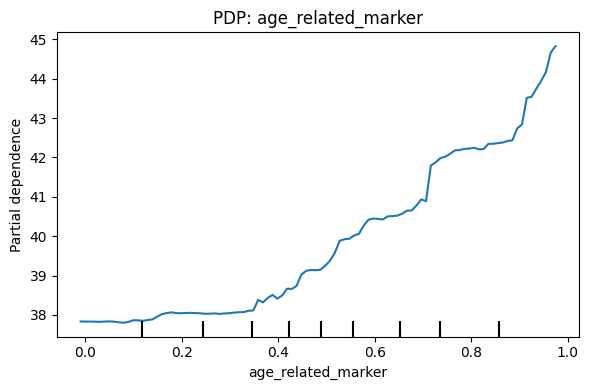

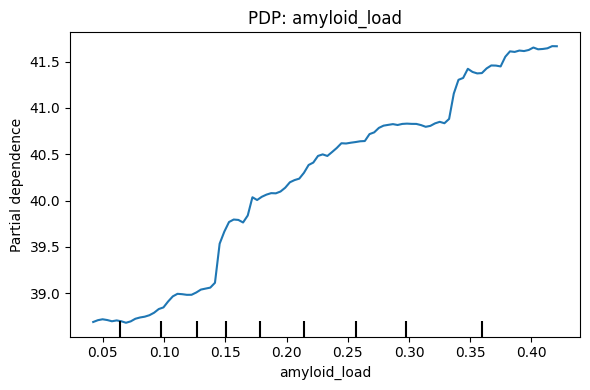

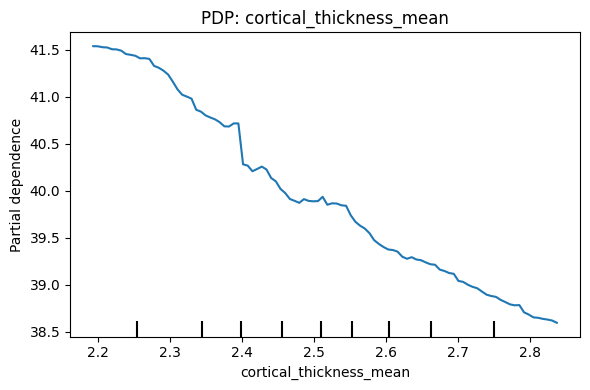

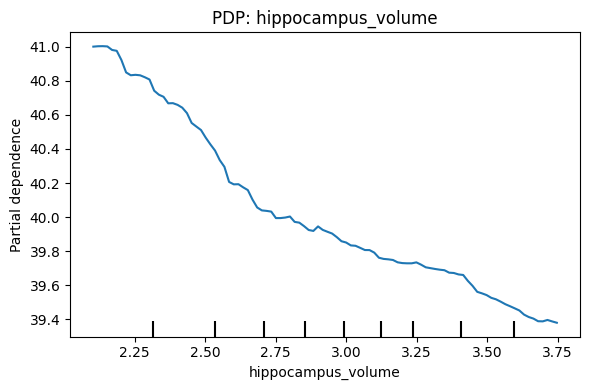

/tmp/ipython-input-2824826525.py:90: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, show=False)


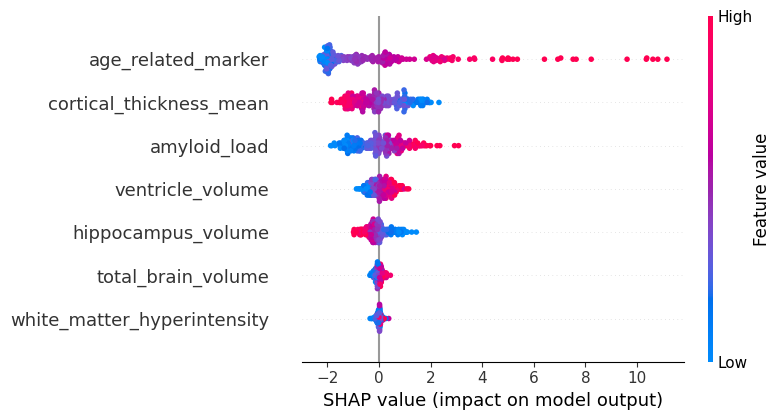

Saved SHAP summary to: /mnt/data/explain_outputs/shap_summary.png


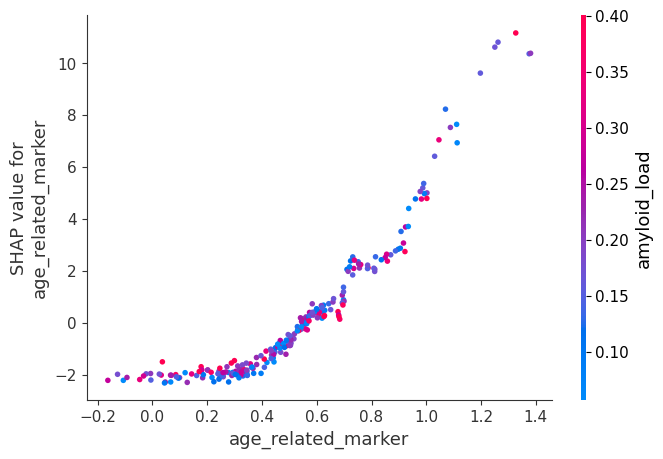

Saved SHAP dependence plot to: /mnt/data/explain_outputs/shap_dependence_age_related_marker.png

LIME library not installed. Install using: pip install lime

All outputs saved to: /mnt/data/explain_outputs
Files created: ['pdp_amyloid_load.png', 'pdp_hippocampus_volume.png', 'pdp_cortical_thickness_mean.png', 'shap_dependence_age_related_marker.png', 'shap_summary.png', 'pdp_age_related_marker.png']


In [ ]:
# Explainable AI: PDP, SHAP, LIME for Brain Age Estimation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# ====================================
# 1. Create Synthetic Brain Age Dataset
# ====================================
np.random.seed(42)
n = 1200

features = {
    "cortical_thickness_mean": np.random.normal(2.5, 0.2, n),
    "ventricle_volume": np.random.normal(30, 8, n),
    "white_matter_hyperintensity": np.random.exponential(1.0, n),
    "hippocampus_volume": np.random.normal(3.0, 0.5, n),
    "age_related_marker": np.random.normal(0.5, 0.3, n),
    "total_brain_volume": np.random.normal(1200, 60, n),
    "amyloid_load": np.random.beta(2, 8, n),
}

X = pd.DataFrame(features)

# Construct a target brain age as a non-linear combination
y = (
    50
    - 6 * X["cortical_thickness_mean"]
    + 0.08 * X["ventricle_volume"]
    - 1.5 * X["hippocampus_volume"]
    + 8 * (X["age_related_marker"] ** 2)
    + 0.002 * X["total_brain_volume"]
    + 10 * X["amyloid_load"]
    + np.random.normal(0, 2.0, n)
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# ====================================
# 2. Train a RandomForest Model
# ====================================
model = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Model MAE: {mae:.3f}, R2: {r2:.3f}")

# Output folder
outdir = "/mnt/data/explain_outputs"
os.makedirs(outdir, exist_ok=True)

# ====================================
# 3. PDP Plots
# ====================================
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = feat_importances.index[:4].tolist()
print("Top features for PDP:", top_features)

pdp_paths = []
for feat in top_features:
    fig, ax = plt.subplots(figsize=(6, 4))
    PartialDependenceDisplay.from_estimator(model, X_train, [feat], ax=ax)
    ax.set_title(f"PDP: {feat}")
    fig.tight_layout()
    path = os.path.join(outdir, f"pdp_{feat}.png")
    fig.savefig(path)
    pdp_paths.append(path)
    plt.show()

# ====================================
# 4. SHAP Plots
# ====================================
try:
    import shap
    shap.initjs()

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # SHAP summary plot
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    shap_summary_path = os.path.join(outdir, "shap_summary.png")
    fig.savefig(shap_summary_path, bbox_inches='tight')
    plt.show()
    print("Saved SHAP summary to:", shap_summary_path)

    # SHAP dependence plot for top feature
    shap.dependence_plot(top_features[0], shap_values, X_test, show=False)
    fig2 = plt.gcf()
    shap_dep_path = os.path.join(outdir, f"shap_dependence_{top_features[0]}.png")
    fig2.savefig(shap_dep_path, bbox_inches='tight')
    plt.show()
    print("Saved SHAP dependence plot to:", shap_dep_path)

except ImportError:
    print("\nSHAP library not installed. Install using: pip install shap")

# ====================================
# 5. LIME Explanation
# ====================================
try:
    from lime.lime_tabular import LimeTabularExplainer

    lime_explainer = LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=X_train.columns.tolist(),
        mode='regression'
    )

    # Explain first test instance
    instance_idx = 0
    exp = lime_explainer.explain_instance(X_test.iloc[instance_idx].values,
                                          model.predict, num_features=5)

    lime_path = os.path.join(outdir, "lime_explanation.html")
    exp.save_to_file(lime_path)
    print("Saved LIME explanation to:", lime_path)

except ImportError:
    print("\nLIME library not installed. Install using: pip install lime")

print("\nAll outputs saved to:", outdir)
print("Files created:", os.listdir(outdir))


In [ ]:
!pip install shap lime scikit-learn matplotlib pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6095b84be600d2ef419d8514b007e3cebd65dd3b53b5d06b542761b701f5050b
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
!pip install nibabel nilearn shap lime scikit-learn matplotlib pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 115.1 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay


In [ ]:
import zipfile

# Path to uploaded zip
zip_path = "/content/dataverse_files.zip"
extract_dir = "/content/brain_data"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)

# Show some files
for root, dirs, files in os.walk(extract_dir):
    for file in files[:10]:  # first 10 files
        print(file)


Files extracted to: /content/brain_data
STA31_tissue.nii.gz
STA29_tissue.nii.gz
STA30_tissue.nii.gz
STA22_regional.nii.gz
STA33.nii.gz
STA23_regional.nii.gz
STA25.nii.gz
STA26_regional.nii.gz
STA35_regional.nii.gz
STA38exp_regional.nii.gz


Shape of brain scan: (135, 189, 155)


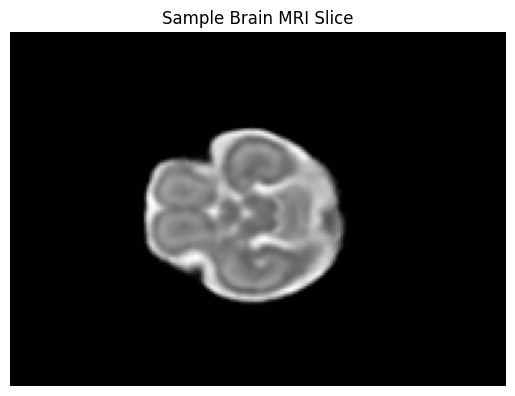

In [ ]:
sample_file = os.path.join(extract_dir, "STA21.nii.gz")  # Replace with actual file name

img = nib.load(sample_file)
data = img.get_fdata()

print("Shape of brain scan:", data.shape)

# Show middle slice
plt.imshow(data[:, :, data.shape[2]//2], cmap='gray')
plt.title("Sample Brain MRI Slice")
plt.axis('off')
plt.show()


In [ ]:
def extract_features_from_scan(filepath):
    img = nib.load(filepath)
    data = img.get_fdata()

    return {
        "mean_intensity": np.mean(data),
        "std_intensity": np.std(data),
        "max_intensity": np.max(data),
        "min_intensity": np.min(data),
        "total_sum": np.sum(data)
    }

# Example
features = extract_features_from_scan(sample_file)
print("Extracted features:", features)


Extracted features: {'mean_intensity': np.float64(90.9051440953702), 'std_intensity': np.float64(432.7729412277985), 'max_intensity': np.float64(3484.869140625), 'min_intensity': np.float64(0.0), 'total_sum': np.float64(359513936.49697244)}


In [ ]:
import pandas as pd

age_csv = "/content/brain_data/labelnames.csv"
age_df = pd.read_csv(age_csv)

print("Columns in CSV:", age_df.columns)
print(age_df.head())


Columns in CSV: Index(['0 Clear Label '], dtype='object')
         0 Clear Label 
0       1 Precentral_L 
1       2 Precentral_R 
2      3 Frontal_Sup_L 
3      4 Frontal_Sup_R 
4  5 Frontal_Sup_Orb_L 


In [ ]:
import os

# List all files in the extracted directory
for root, dirs, files in os.walk("/content/brain_data"):
    for name in files:
        print(os.path.join(root, name))


/content/brain_data/STA31_tissue.nii.gz
/content/brain_data/STA29_tissue.nii.gz
/content/brain_data/STA30_tissue.nii.gz
/content/brain_data/STA22_regional.nii.gz
/content/brain_data/STA33.nii.gz
/content/brain_data/STA23_regional.nii.gz
/content/brain_data/STA25.nii.gz
/content/brain_data/STA26_regional.nii.gz
/content/brain_data/STA35_regional.nii.gz
/content/brain_data/STA38exp_regional.nii.gz
/content/brain_data/STA37exp.nii.gz
/content/brain_data/STA26_tissue.nii.gz
/content/brain_data/STA23_tissue.nii.gz
/content/brain_data/STA21_regional.nii.gz
/content/brain_data/STA36exp_regional.nii.gz
/content/brain_data/STA21.nii.gz
/content/brain_data/STA28_regional.nii.gz
/content/brain_data/STA33_tissue.nii.gz
/content/brain_data/STA30_regional.nii.gz
/content/brain_data/STA34_tissue.nii.gz
/content/brain_data/STA37exp_regional.nii.gz
/content/brain_data/STA34.nii.gz
/content/brain_data/STA36exp_tissue.nii.gz
/content/brain_data/STA29_regional.nii.gz
/content/brain_data/cksum_output.txt
/

In [ ]:
import pandas as pd

# Load label names
label_df = pd.read_csv("/content/brain_data/labelnames.csv")
print(label_df.head())


         0 Clear Label 
0       1 Precentral_L 
1       2 Precentral_R 
2      3 Frontal_Sup_L 
3      4 Frontal_Sup_R 
4  5 Frontal_Sup_Orb_L 


In [ ]:
label_df.columns = ["Label"]
label_df["Label_ID"] = label_df["Label"].str.extract(r'(\d+)')
label_df["Label_Name"] = label_df["Label"].str.extract(r'\d+\s+(.*)')
label_df.drop(columns=["Label"], inplace=True)
print(label_df.head())


  Label_ID          Label_Name
0        1       Precentral_L 
1        2       Precentral_R 
2        3      Frontal_Sup_L 
3        4      Frontal_Sup_R 
4        5  Frontal_Sup_Orb_L 


In [ ]:
import nibabel as nib

# Load a regional brain scan
nii_path = "/content/brain_data/STA24_regional.nii.gz"
img = nib.load(nii_path)

# Get the data as a numpy array
data = img.get_fdata()

print("Shape:", data.shape)


Shape: (135, 189, 155)


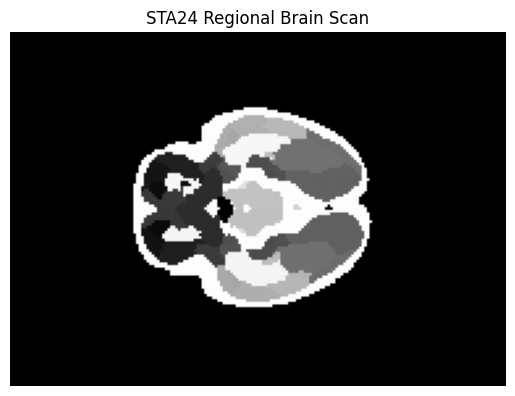

In [ ]:
import matplotlib.pyplot as plt

# Display the middle slice
plt.imshow(data[:, :, data.shape[2] // 2], cmap='gray')
plt.title("STA24 Regional Brain Scan")
plt.axis('off')
plt.show()


In [ ]:
region_number = int(data[50, 50, 30])  # Example voxel
region_name = label_df.loc[label_df["Label_ID"].astype(int) == region_number, "Label_Name"].values
print("Region:", region_name[0] if len(region_name) > 0 else "Unknown")


Region: Unknown


In [ ]:
!pip install shap lime scikit-learn matplotlib numpy pandas


In [ ]:
!pip install lime shap nibabel


In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import shap
from lime.lime_tabular import LimeTabularExplainer

plt.style.use('seaborn-v0_8')


In [ ]:
zip_path = "/content/dataverse_files.zip"
extract_path = "/content/brain_data"

# Unzip dataset
if not os.path.exists(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Extracted dataset!")
else:
    print("✅ Dataset already extracted!")

print("Files inside extracted folder:")
print(os.listdir(extract_path))


In [ ]:
label_csv = os.path.join(extract_path, "labelnames.csv")
label_df = pd.read_csv(label_csv)

# Extract ID and Name
label_df.columns = ["Label"]
label_df["Label_ID"] = label_df["Label"].str.extract(r'(\d+)').astype(int)
label_df["Label_Name"] = label_df["Label"].str.extract(r'\d+\s+(.*)')
label_df = label_df.drop(columns=["Label"])

print("✅ Cleaned Labels:")
print(label_df.head())


In [ ]:
# Find the regional NIfTI file
nifti_files = [f for f in os.listdir(extract_path) if "regional" in f and f.endswith(".nii.gz")]
if not nifti_files:
    raise FileNotFoundError("❌ No regional NIfTI files found!")

nii_path = os.path.join(extract_path, nifti_files[0])
print("Using NIfTI file:", nii_path)

# Load NIfTI
img = nib.load(nii_path)
data = img.get_fdata()
print("Brain scan shape:", data.shape)

# Aggregate per region
flat_data = []
for region_id in np.unique(data):
    if region_id == 0:  # skip background
        continue
    coords = np.argwhere(data == region_id)
    x_mean, y_mean, z_mean = coords.mean(axis=0)
    flat_data.append([int(region_id), x_mean, y_mean, z_mean, len(coords)])

brain_df = pd.DataFrame(flat_data, columns=["Region_ID", "X", "Y", "Z", "Voxel_Count"])

# Merge with region names
brain_df = brain_df.merge(label_df, left_on="Region_ID", right_on="Label_ID", how="left")
print("✅ Aggregated Brain Data:")
print(brain_df.head())


In [ ]:
np.random.seed(42)
brain_df['Age'] = np.random.randint(20, 80, size=len(brain_df))

features = ["X", "Y", "Z", "Voxel_Count", "Region_ID"]
X = brain_df[features]
y = brain_df["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
print("✅ Model Trained Successfully!")


✅ Model Trained Successfully!


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_test, ["Region_ID"], kind='both', ax=ax)
plt.title("PDP & ICE Plot - Region_ID")
plt.tight_layout()
plt.show()


In [ ]:
# Dynamically pick sample size so it never exceeds the dataset
sample_size = min(50, len(X_test))
X_shap = X_test.sample(sample_size, random_state=42)


# SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)

# Summary plot
shap.summary_plot(shap_values, X_shap, feature_names=features)

# Dependence plot for Region_ID
shap.dependence_plot("Region_ID", shap_values, X_shap)


In [ ]:
# Create LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

# Choose a random instance from test set
i = 0
instance = X_test.iloc[i]

# Explain prediction
lime_exp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict
)

# Show results
lime_exp.show_in_notebook(show_table=True)


In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# PDP & ICE for a single feature
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=["Region_ID"],  # Replace with any feature name
    kind="both"  # 'average', 'individual', or 'both'
)
plt.title("PDP & ICE Plot - Region_ID")
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=["X", "Y", "Z", "Region_ID"],  # list of features
    kind="average"  # use 'both' if you want ICE too
)
plt.suptitle("PDP Plots for Brain Features", fontsize=14)
plt.show()


In [ ]:
plt.figure(figsize=(12, 10))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=["X", "Y", "Z", "Region_ID"],
    kind="both",
    subsample=500  # speed optimization
)
plt.suptitle("PDP & ICE Plots for Brain Features", fontsize=16)
plt.show()
